## Outliers Analysis

In this section we will try to find outliers in our data. To do that, we will use DBSCAN with all features

In [88]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('../assets/final/data.csv')

In [89]:
from sklearn.cluster import DBSCAN
import numpy as np

def DB_outliers(df, eps, min_samples): # Adapted from https://donernesto.github.io/blog/outlier-detection-with-dbscan/
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(df)

    labels = np.zeros(len(db.labels_))
    print(db.labels_)
    
    # make a list of tuples: (i, num points in i) for i in db.labels_
    label_counts = [(i, np.sum(db.labels_==i)) for i in set(db.labels_) - set([-1])]
    label_counts.sort(key=lambda x : -x[1]) # sort by counts per class, descending
    
    # assign the labels. Those points with label =-1 get highest label (equal to number of classes -1) 
    labels[db.labels_== -1] = len(set(db.labels_)) - 1
    for i, (label, label_count) in enumerate(label_counts):
        labels[db.labels_==label] = i

    # Scale the values between 0 and 1
    labels = (labels - min(labels)) / (max(labels) - min(labels))
    print("Num Clusters:" + str(len(set(labels))))
    print("Size Outliers:" + str(np.sum(labels == 1)))

The number of `min_samples` should be 2*number_dimensions. [Source](https://www.reneshbedre.com/blog/dbscan-python.html).

To find the optimal `eps` value, which is the radius of neighbourhoods, we'll gorup the data with K-NN. In the k-NN distance plot, you should look for the “knee” of the curve to find the optimal value of ε. In the below plot, the knee occurs at approximately 3800 i.e. the points below 3800 belong to a cluster and points above 3800 are noise or outliers (noise points will have higher kNN distance).

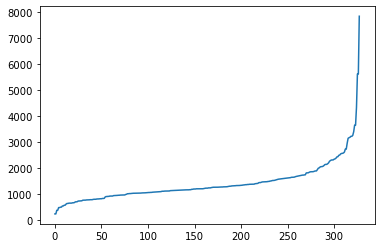

In [90]:
from sklearn.neighbors import NearestNeighbors

def k_distance_plot(df, min_samples):
    neigh = NearestNeighbors(n_neighbors=min_samples)
    nbrs = neigh.fit(df)
    distances, indices = nbrs.kneighbors(df)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

k_distance_plot(data, len(data.columns) * 2)

In [91]:
eps = 3800
min_samples = len(data.columns) * 2
DB_outliers(data, eps, min_samples)

[-1  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0
 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  1 -1  0  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0 -1  0 -1 -1
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0  1  0  1
  0 -1  0  0  1  1 -1  0  0  0  0 -1 -1 -1  0  0  0 -1  0  0  0  1  0  0
  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  1
  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  0  0 -1 -1 -1  0 -1  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0
  1  0 -1  0  0  0 -1 -1 -1  1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  1  0 -1 -1  0  0  0
 -1  0  0  0  0  0  0  0  0  1  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  1  0  0  1  0  1 -1  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0]
N

### Outliers (%)

In [92]:
100 * (68 / len(data))

20.73170731707317

According to DBSCAN, our data contains 20.7% of outliers.